# Introduction to Logistic Regression

#### Logistic Regression, a History
It would be inappropriate to discuess logistic regression without first mentioning its sister algorithm: linear regression. Linear regression, in short, is a method to fit a line to a series of data points via updating a set of variable weights to maximize accuracy and minimize error between resulting predictions and known target values. In linear regression, the outcome is continuous, with infinite possible values and is well-suited for predicting values that fall into this number space. However, when faced with categorical data, it fails to meet the bar, as it is an inherently different machine learning task.

The linear regression approach taken for predicting continuous values can be tweaked and applied to categorical data which results in the entirely new model, called logistic regression. This transformation is introduced by constraining the output to fall within the number space of 0 and 1 through a convenient little trick: the sigmoid function. 

Before, where we had the linear regression function form of `y = mx + b`, we can now add the sigmoid function `p = 1 / (1 + e^-y)` to constrain the output of the original formula to fall between 0 and 1. Using a threshold value of 0.5 allows us to classify predictions from this model into discrete binary classes.

Logistic regression is a key supervised learning method that is a building block of many more advanced methods, so it's important to know what it is and what its use cases are.


------
### Collecting data

It is important to gather appropriate data for this binary classification task. This notebook uses data from `scikit-learn.datasets` to train a logistic classifier. It should be noted that this is quite a small dataset, making this more of a toy example that almost certainly overfits to the small dataset. However, it is still important to follow basic procedure of shuffling and splitting data into train/test sets. This can help eliminate biases in our model and help it generalize to unseen data.

In [56]:
import csv
import numpy as np
import random
import zipfile
from numpy import genfromtxt

# Collect data from sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.utils import shuffle

data, target = load_breast_cancer(True)
data, target = shuffle(data, target)

# Split into train/test
TRAIN_SPLIT = int(0.7*len(X))
X_train = data[:TRAIN_SPLIT,:]
Y_train = target[:TRAIN_SPLIT]
X_test = data[TRAIN_SPLIT:,:]
Y_test = target[TRAIN_SPLIT:]

# Report information on data
print("Number of training samples: {}".format(len(X_train)))
print("Number of testing samples: {}".format(len(X_test)))

Number of training samples: 398
Number of testing samples: 171


----
### Training a model

The next step is to actually train a classifier on the training data set. Below is a set of 10 trials of our Logistic Regression model and it's performance on each round.

In [76]:
from sklearn.linear_model import LogisticRegression

scores = []

# Run model 10 different times to compare results
for i in range(10):
    # Reshuffle each round
    data, target = shuffle(data, target)

    # Re-split into train/test
    TRAIN_SPLIT = int(0.7*len(X))
    X_train = data[:TRAIN_SPLIT,:]
    Y_train = target[:TRAIN_SPLIT]
    X_test = data[TRAIN_SPLIT:,:]
    Y_test = target[TRAIN_SPLIT:]

    model = LogisticRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)
    score = model.score(X_test, Y_test)
    scores.append(score)


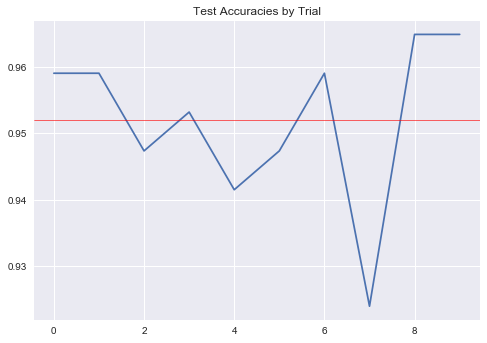

In [77]:
%matplotlib inline 

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(scores)
plt.axhline(np.average(scores), c='r', lw=0.6)
plt.title("Test Accuracies: Logistic Regression")
plt.show()

----
Average accuracies are quite high most likely due to overfitting to a very small an relatively simple data set, but it also shows the power of the logistic sigmoid in transforming simple linear regression into a classification model. Below, is a linear regression model's results on this task for rather a silly comparison, as you should never *really* use a regression model for classification, but it helps demonstrate the use case for using a logistic function in a machine learning model.

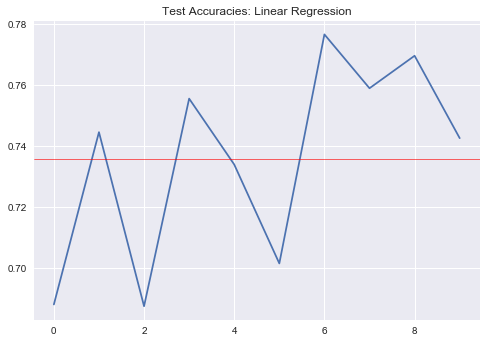

In [80]:
from sklearn.linear_model import LinearRegression

linear_scores = []

# Run model 10 different times to compare results
for i in range(10):
    # Reshuffle each round
    data, target = shuffle(data, target)

    # Re-split into train/test
    TRAIN_SPLIT = int(0.7*len(X))
    X_train = data[:TRAIN_SPLIT,:]
    Y_train = target[:TRAIN_SPLIT]
    X_test = data[TRAIN_SPLIT:,:]
    Y_test = target[TRAIN_SPLIT:]

    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)
    score = model.score(X_test, Y_test)
    linear_scores.append(score)

plt.plot(linear_scores)
plt.axhline(np.average(linear_scores), c='r', lw=0.6)
plt.title("Test Accuracies: Linear Regression")
plt.show()